In [1]:
%load_ext autoreload
%load_ext nb_black
%autoreload 2

import numpy as np
import ncxt_sxtcnn

import logging

logger = logging.getLogger("ncxtamira")
logger.setLevel(logging.ERROR)

# Basic Template
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
import ncxtamira

%load_ext autoreload
%autoreload 2
%load_ext nb_black
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
from ncxtamira.organelles import LabelTree, Organelles, Node
# _ = Node("newmember", Organelles._root.find('nucleolus'))
Organelles.pptree()


       ┌capillary
       ├buffer
 sample┤
       │    ┌membrane
       │    ├mitochondria
       │    ├chloroplast
       │    ├endoplasmic reticulum
       │    ├granule
       └cell┤
            │       ┌nucleolus
            ├nucleus┤
            │       ├euchromatin
            │       └heterochromatin
            └golgi


<IPython.core.display.Javascript object>

In [15]:
from ncxt_sxtcnn.pipe import NCXTPipe

db_base = "C:/Users/axela/OneDrive/Documents/2020/mock_NAS/"
folder1 = db_base + "Binned1/"
# folder1 = db_base + "Empty/"
folder2 = db_base + "Binned2/"
wd = "C:/Users/axela/Documents/2021/ncxtcnn/mock/"

pipe = NCXTPipe(
    folder=folder2,
    folder_base=folder1,
    working_directory=wd,
    task=["cell", "nucleus"],
    fold=0,
    sanitize=True,
    settings={"maximum_iterations": 10},
)
pipe.db.dataframe()

Files 14 + 16


,project,sample,hxpath,void,void1,nucleus,granule,mitochondria,membrane,nucleolus,lipid,endoplasmic reticulum,ignore
0,Stevens,Stevens_pancreatic_Ins_1E_25-10_30min_822_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,
1,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_10,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
2,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_2,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,5.0,8,3.0,6.0,7.0,9.0
3,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,4,6.0,7,3.0,,5.0,
4,Stevens,Stevens_pancreatic_Ins_1E_25mM_766_8,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,4,2,3.0,5,,,,
5,Stevens,Stevens_pancreatic_INS_1E_25mM_769_5,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,,3,,,,
6,Stevens,Stevens_pancreatic_INS_1E_25mM_769_7,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
7,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_4,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
8,Stevens,Stevens_pancreatic_Ins_1E_25mM_777_9,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,,1,2,3.0,4,,,,
9,Stevens,Stevens_pancreatic_Ins_1E_25mM_784_6,C:\Users\axela\OneDrive\Documents\2020\mock_NA...,0,1.0,2,3,4.0,5,,,,


<IPython.core.display.Javascript object>

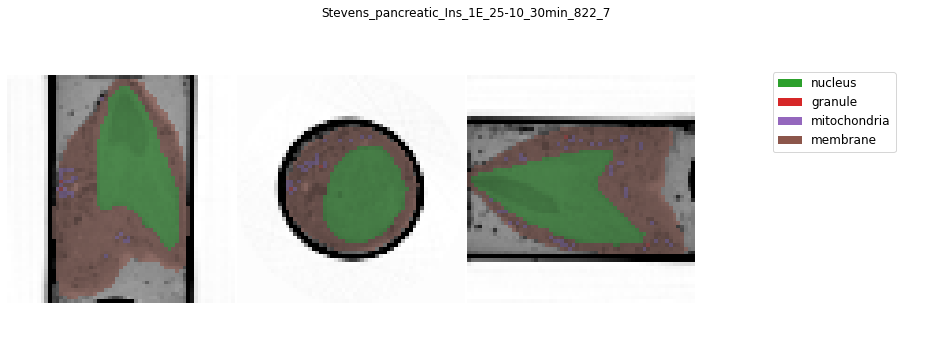

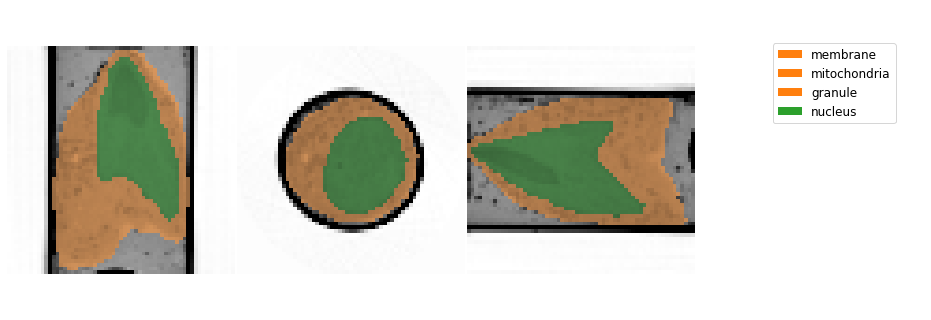

<IPython.core.display.Javascript object>

In [5]:
pipe.check_loader(0)

In [6]:
pipe.train()

<IPython.core.display.Javascript object>

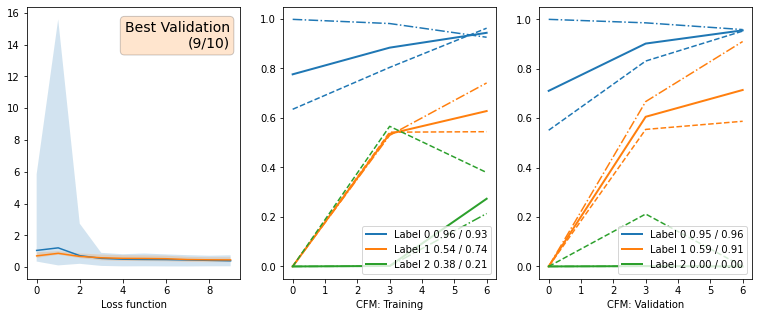

<IPython.core.display.Javascript object>

In [8]:
pipe.sxtcnn.logger.plot()

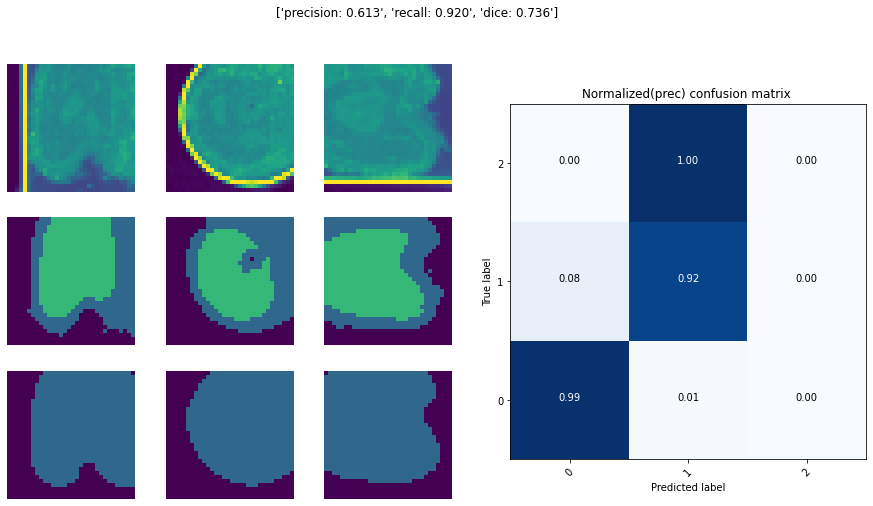

<IPython.core.display.Javascript object>

In [11]:
pipe.sxtcnn.evaluate_training_data(mode="validation")
# pipe.sxtcnn.show_receptive_field()